# Salary predictor for tech employees in Canada based on survey data

## Introduction
Graduates and seasoned tech employees may have a question about how much they should get paid from their employers for the reason that salary is never transparent information. Lack of enough information, graduates may feel lost and insecure and job seekers may be at disadvantage when having salary discussion with HR. Hence, we come up with this idea to build up a model to predict the pay that technicians can expect based on several explicit factors including education level, previous experience, location etc.

## Methods
### Data
The data set used in this project is sourced from the survey, [Stack Overflow Annual Developer Survey](https://insights.stackoverflow.com/survey), which is conducted annually with nearly 80000 responses from different backgrounds. Based on the survey results {cite:p}`stack_overflow_survey`, much useful features could be extracted such as education level, location, the language used, job type, all of which are potentially associated with the annual compensation.

### Exploratory Data Analysis
After performing EDA on the training data set, there several points worth mention. The distribution of the response variable, salary, is positive skewed with a fat tail, as shown in Fig. 1 {cite:p}`vanderplas2018altair`. This attribute is undesirable, which makes the model less robust. So, extremely high salary (top 8%) in our training data set will be defined as outliers which are removed in the preprocessing step.<br>

```{figure} ../results/salary_density_plot.png
---
height: 400px
name: salary_density
---
Density plot of salary
```

Among all the features investigated, it can be found that the salary is strongly correlated to the number of professional coding years. Fig.2 clearly shows that there is a linear relation between the number of professional coding years and the salary.

```{figure} ../results/code_years_plot.png
---
height: 400px
name: code_years_plot
---
Number of coding years Vs. salary
```

Figures below present how other 3 features we selected have significant effects on the income level.
```{figure} ../results/edu_plot.png
---
height: 150px
name: edu_plot
---
Education levels related to salary
```
```{figure} ../results/language_plot.png
---
height: 150px
name: lang_plot
---
Programming languages related to salary
```
```{figure} ../results/role_plot.png
---
height: 150px
name: role_plot
---
Roles related to salary
```
### Model
In light of EDA and recommendations from Stack Overflow, 4 features are extracted that are duration for being a profession, education level, programming language worked with and job position. Then, the regression equation can be obtained:<br>

$$ 
    Y_{salary} = w^T X + b
$$

*where w is the weight vector, X is the feature vector, b is the error term, $Y_{salary}$ is predicted variable.* <br>

Within the training data set, randomized hyperparameter searching {cite:p}`scikit-learn` was also carried out based on the scoring matrix, $R^2$.

# Results

/Users/supernova/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator SimpleImputer from version 1.0.1 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/Users/supernova/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator StandardScaler from version 1.0.1 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/Users/supernova/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator Pipeline from version 1.0.1 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/Users/supernova/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator OneHotEncoder from version 1.0.1 when using version 0.24.1. 

0.091

0.725

0.718

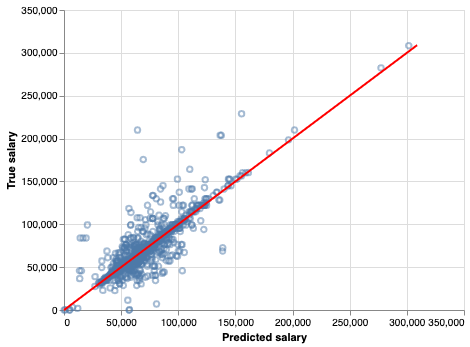

In [4]:
from joblib import dump, load
import pandas as pd
from myst_nb import glue
import altair as alt
from altair_saver import save
alt.data_transformers.enable('data_server')
alt.renderers.enable('mimetype')


pipe_loaded = load('../results/best_model_pipe.joblib')
alpha = round(pipe_loaded.best_params_['ridge__alpha'], 3)
rsquare = round(pipe_loaded.best_score_, 3)
glue("alpha_coef", alpha);
glue("R2", rsquare);

test_result_loaded = load('../results/test_result.joblib')
rsquare_test = round(test_result_loaded["r_sq_test"], 3)
glue("R2_test", rsquare_test);

test_df = pd.read_csv("../../data/processed/test.csv")
y_test = test_df.ConvertedComp.tolist()
y_predict = test_result_loaded["predict_y"].tolist()
result = {"true_y": y_test, "predicted_y": y_predict}
df_result = pd.DataFrame(data=result)
df_result.head(5)

df_diag = pd.DataFrame(data={"true_y": [0, max(df_result.true_y)+500],
                             "predicted_y":[0, max(df_result.true_y)+500]})

alt.Chart(df_result).mark_point(opacity=0.5).encode(
    alt.X("predicted_y", title="Predicted salary"),
    alt.Y("true_y", title="True salary")
) + alt.Chart(df_diag).mark_line(color='red').encode(
    alt.X("predicted_y", title="Predicted salary"),
    alt.Y("true_y", title="True salary")
)

The hyperparameter tunning result shows that the model is at the best performance when alpha = {glue:text}`alpha_coef` with a training $R^2$  of {glue:text}`R2` as shown in the figure below.

```{figure} ../results/alpha-tuning.png
---
height: 400px
name: alpha-tuning
---
Hyperparameter searching
```
Applying the fitted model to the test data set, we get  a testing $R^2$ of {glue:text}`R2_test`.

# Reference

```{bibliography}
```